Alumno: Escobar Sánchez José Alejandro, 19170573

para la materia de Inteligencia Artificial

# Ejemplo de Support Vector Machine y ANN

Para predecir el riesgo de fallo cardíaco de acuerdo a diversos factores incluidos en el dataset:

https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

Importar los datos que he cargado en mi Google Drive y obtener una vista previa del contenido del dataset, así como buscar si se encuentra algún dato faltante:

In [30]:
data_df = pd.read_csv("/content/drive/MyDrive/Colab Data/heart_failure_clinical_records_dataset.csv")
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [31]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Definir los atributos como sets de entrenamiento y pruebas, 'X' y 'y', respectivamente. A continuación, obtener mediciones estandarizadas de los Features incluidos en el dataset:

In [32]:
X=data_df.drop(["DEATH_EVENT"],axis=1)
y=data_df["DEATH_EVENT"]

In [33]:
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


Dividir nuestro data set en los segmentos necesarios para la ejecución de train_test_split:

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=25)

## Utilizar el algoritmo SVM

Instanciar y agregar el modelo a la instancia. Después, obtener la puntuación:

In [35]:
model1=svm.SVC()
model1.fit (X_train, y_train)
y_pred = model1.predict(X_test)
model1.score (X_test, y_test)

0.7888888888888889

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84        60
           1       0.69      0.67      0.68        30

    accuracy                           0.79        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90



## Utilizar el ANN

Crear el modelo de Red Neuronal con cuatro capas utilizando ReLu y el optimizador Adam para obtener la precisión del modelo:

In [37]:
model = Sequential()

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 25, epochs = 80, validation_split=0.25)

Epoch 1/80
7/7 [==============================] - 2s 50ms/step - loss: 0.6927 - accuracy: 0.6282 - val_loss: 0.6909 - val_accuracy: 0.8302
Epoch 2/80
7/7 [==============================] - 0s 14ms/step - loss: 0.6920 - accuracy: 0.6346 - val_loss: 0.6891 - val_accuracy: 0.8302
Epoch 3/80
7/7 [==============================] - 0s 15ms/step - loss: 0.6911 - accuracy: 0.6346 - val_loss: 0.6871 - val_accuracy: 0.8302
Epoch 4/80
7/7 [==============================] - 0s 15ms/step - loss: 0.6905 - accuracy: 0.6346 - val_loss: 0.6850 - val_accuracy: 0.8302
Epoch 5/80
7/7 [==============================] - 0s 14ms/step - loss: 0.6896 - accuracy: 0.6346 - val_loss: 0.6828 - val_accuracy: 0.8302
Epoch 6/80
7/7 [==============================] - 0s 14ms/step - loss: 0.6888 - accuracy: 0.6346 - val_loss: 0.6805 - val_accuracy: 0.8302
Epoch 7/80
7/7 [==============================] - 0s 14ms/step - loss: 0.6873 - accuracy: 0.6346 - val_loss: 0.6780 - val_accuracy: 0.8302
Epoch 8/80
7/7 [===========

Calcular la precisión del modelo:

In [38]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 84.41%


Validar la pérdida a lo largo de las épocas:

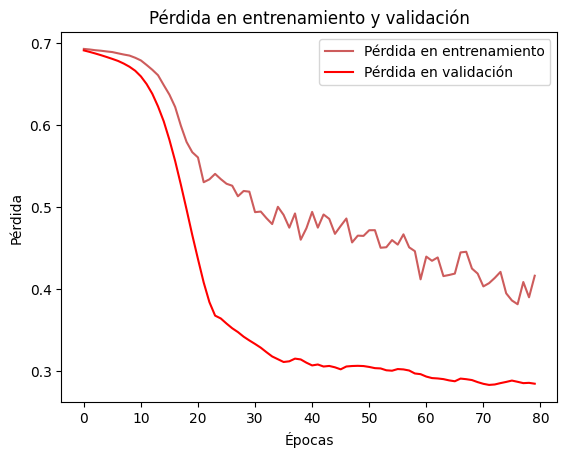

In [39]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Pérdida en entrenamiento')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Pérdida en validación')
plt.title('Pérdida en entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(loc="best")

plt.show()

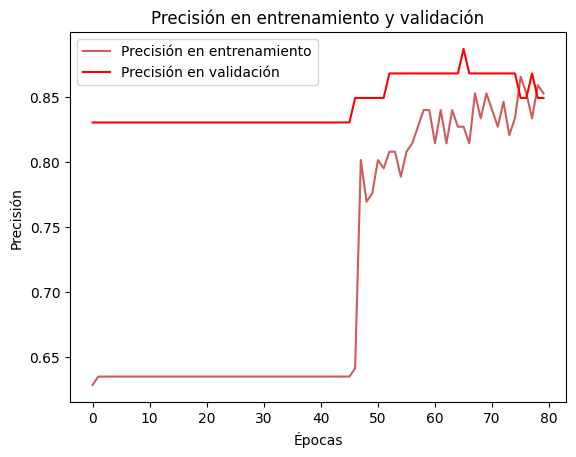

In [40]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Precisión en entrenamiento')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Precisión en validación')

plt.title('Precisión en entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()